In [3]:
import pandas as pd    
import matplotlib.pyplot as plt   
import numpy as np

In [36]:
link_dieuhanh = r'C:\Users\trand\Documents\study\university\23_24_ki2\CAP1\dieu_hanh\dieu_hanh_29_04.xlsx'

In [37]:
dh = pd.read_excel(link_dieuhanh)

In [4]:
dh.dtypes

Đối tác                    object
ID                         object
Dịch vụ                    object
Code đối tác               object
Tên khách                  object
Khách sạn                  object
1VN/2QT                    object
khoi_hanh          datetime64[ns]
ket_thuc           datetime64[ns]
Ngày khởi hành              int64
Tháng khởi hành             int64
Ngày kết Tour               int64
Tháng kết tour              int64
Năm                         int64
Tour_type                  object
Nationality                object
TE                          int64
NL                          int64
dtype: object

In [36]:
dh['Nationality'].unique()

array(['angloAmerican', 'eastAsian', 'else', 'southAsian', 'european'],
      dtype=object)

# Tỉ lệ tăng trưởng

In [37]:
# Tạo cột 'tháng-năm' từ cột 'khoi_hanh' để nhóm theo tháng và năm
dh['tháng_năm'] = dh['khoi_hanh'].dt.to_period('M')

# Nhóm tour theo tháng và năm và đếm số lượng tour trong mỗi tháng
tour_by_month = dh.groupby('tháng_năm').size()

# Tính tỉ lệ tăng trưởng giữa các tháng
growth_rate = (tour_by_month.diff() / tour_by_month.shift(1)) * 100

# Tạo dataframe df_gr từ Series growth_rate
df_gr = pd.DataFrame({'growth_rate': growth_rate})

In [38]:
df_gr

,growth_rate
tháng_năm,
2023-01,NaN
2023-02,5.419451
2023-03,2.183099
2023-04,15.920055
2023-05,-8.680143
2023-06,3.645833
2023-07,-3.580402
2023-08,14.723127
2023-09,-24.134015


# tương quan thời gian vs ..

## dịch vụ

In [39]:
import seaborn as sns

In [40]:
dh['ID'].unique()

array(['BN_PRE', 'BN', 'BN_0e', 'HUE', 'DN', 'ST_NHS_HA', 'NHS_HA',
       'MS_HA', 'MS', 'CLC', 'DN_HA', 'BN_PRE_0e', 'HUE_PRE', 'RD'],
      dtype=object)

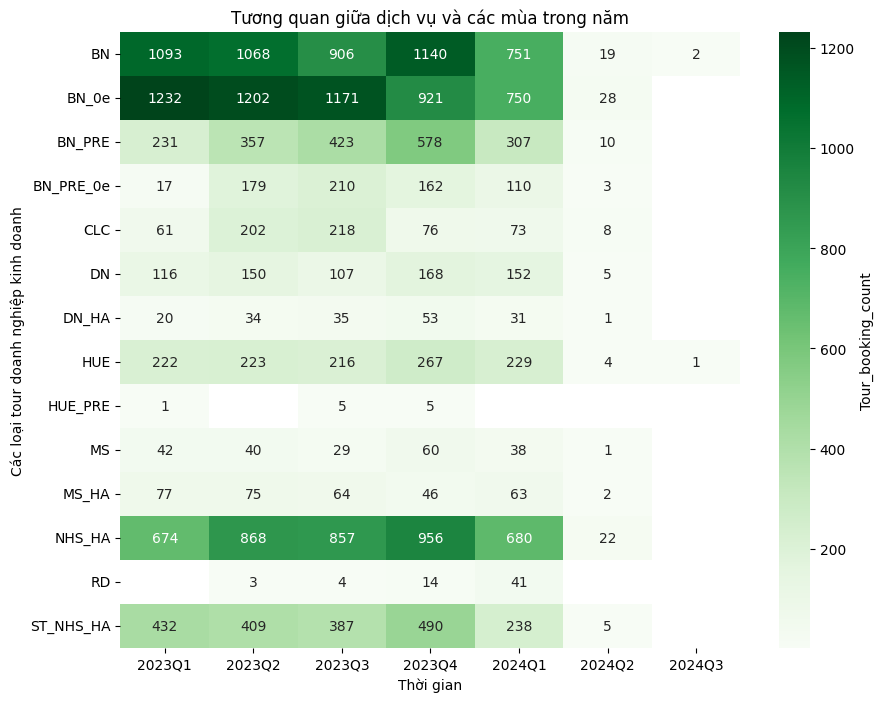

In [41]:
import seaborn as sns
sl_dat_tour = dh.groupby(['ID', dh['khoi_hanh'].dt.to_period('Q')]).size().reset_index(name="Tour_booking_count")
sl_dat_tour = sl_dat_tour.sort_values(by='Tour_booking_count', ascending=False)


plt.figure(figsize=(10, 8))  # Thay đổi kích thước của hình ảnh
heatmap_data = sl_dat_tour.pivot(index='ID', columns='khoi_hanh', values='Tour_booking_count')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap="Greens", cbar_kws={'label': 'Tour_booking_count'})
plt.title('Tương quan giữa dịch vụ và các mùa trong năm')
plt.xlabel('Thời gian')
plt.ylabel('Các loại tour doanh nghiệp kinh doanh')
plt.show()

In [42]:
heatmap_data

khoi_hanh,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3
ID,,,,,,,
BN,1093.0,1068.0,906.0,1140.0,751.0,19.0,2.0
BN_0e,1232.0,1202.0,1171.0,921.0,750.0,28.0,NaN
BN_PRE,231.0,357.0,423.0,578.0,307.0,10.0,NaN
BN_PRE_0e,17.0,179.0,210.0,162.0,110.0,3.0,NaN
CLC,61.0,202.0,218.0,76.0,73.0,8.0,NaN
DN,116.0,150.0,107.0,168.0,152.0,5.0,NaN
DN_HA,20.0,34.0,35.0,53.0,31.0,1.0,NaN
HUE,222.0,223.0,216.0,267.0,229.0,4.0,1.0
HUE_PRE,1.0,NaN,5.0,5.0,NaN,NaN,NaN


In [43]:
correlation_matrix = heatmap_data.corr()
correlation_matrix


khoi_hanh,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3
khoi_hanh,,,,,,,
2023Q1,1.000000,0.981452,0.962456,0.928498,0.956099,0.914320,1.0
2023Q2,0.981452,1.000000,0.993329,0.957822,0.983385,0.961910,1.0
2023Q3,0.962456,0.993329,1.000000,0.953360,0.975707,0.974803,1.0
2023Q4,0.928498,0.957822,0.953360,1.000000,0.978822,0.894773,1.0
2024Q1,0.956099,0.983385,0.975707,0.978822,1.000000,0.948785,1.0
2024Q2,0.914320,0.961910,0.974803,0.894773,0.948785,1.000000,1.0
2024Q3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [44]:
khach_dat_tour = dh.groupby(['Nationality', dh['khoi_hanh'].dt.to_period('Q')]).agg({'NL': 'sum', 'TE': 'sum'}).reset_index()
khach_dat_tour['Customer_count'] = khach_dat_tour['NL' ] + khach_dat_tour['TE']
khach_dat_tour = khach_dat_tour.drop(columns=['NL', 'TE']) # Bỏ cột NL và TE nếu cần
khach_dat_tour = khach_dat_tour.sort_values(by='Customer_count', ascending=False)

khach_dat_tour

,Nationality,khoi_hanh,Customer_count
8,eastAsian,2023Q3,4357
7,eastAsian,2023Q2,3810
6,eastAsian,2023Q1,3527
9,eastAsian,2023Q4,3207
28,southAsian,2023Q4,3202
26,southAsian,2023Q2,2755
1,angloAmerican,2023Q2,2704
2,angloAmerican,2023Q3,2633
0,angloAmerican,2023Q1,2584
3,angloAmerican,2023Q4,2503


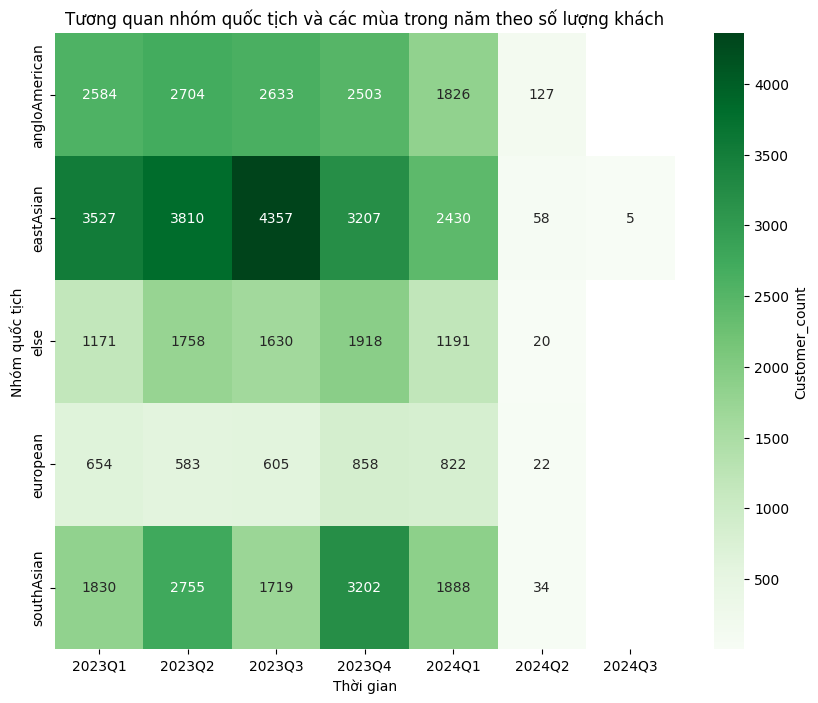

In [45]:
import seaborn as sns
khach_dat_tour = dh.groupby(['Nationality', dh['khoi_hanh'].dt.to_period('Q')]).agg({'NL': 'sum', 'TE': 'sum'}).reset_index()
khach_dat_tour['Customer_count'] = khach_dat_tour['NL' ] + khach_dat_tour['TE']
khach_dat_tour = khach_dat_tour.drop(columns=['NL', 'TE']) # Bỏ cột NL và TE nếu cần
khach_dat_tour = khach_dat_tour.sort_values(by='Customer_count', ascending=False)


plt.figure(figsize=(10, 8))
heatmap_data = khach_dat_tour.pivot(index='Nationality', columns='khoi_hanh', values='Customer_count')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap="Greens", cbar_kws={'label': 'Customer_count'})
plt.title('Tương quan nhóm quốc tịch và các mùa trong năm theo số lượng khách')
plt.xlabel('Thời gian')
plt.ylabel('Nhóm quốc tịch')
plt.show()

In [7]:
dt_goc = pd.read_excel(r'C:\Users\trand\Documents\study\university\23_24_ki2\CAP1\Analytics\data\TOUR_detail.xlsx',sheet_name='Tour_detail')

In [47]:
dt_goc

,search_box,ID,Loại Tour,"Ăn uống (0,1)",thời lượng tham quan,Các điểm du lịch trong Tour
0,Bà Nà,BN,1,1,9.5,"Sun World Ba Na Hills,Golden Bridge"
1,Bà Nà - không ăn,BN_0e,1,0,9.5,"Sun World Ba Na Hills,Golden Bridge"
2,Bà Nà Pre,BN_PRE,2,1,9.5,"Sun World Ba Na Hills,Golden Bridge"
3,Bà Nà Pre không ăn,BN_PRE_0e,2,1,9.5,"Sun World Ba Na Hills,Golden Bridge"
4,Bà Nà-Hội An-Mỹ Sơn,BN_MS_HA,2,1,16.0,"Sun World Ba Na Hills,Golden Bridge,Hoi An Anc..."
5,Huế City,HUE,1,1,9.5,"Bến thuyền Tòa Khâm,Chùa Thiên Mụ,Kinh thành H..."
6,Huế city - Pre,HUE_PRE,2,1,9.5,"Bến thuyền Tòa Khâm,Chùa Thiên Mụ,Kinh thành H..."
7,Cham island,CLC,1,1,8.0,"CLC,Lặn san hô,Khu bảo tồn"
8,MS HA,MS_HA,1,1,6.5,"Hoi An Ancient Town,Japanese Covered Bridge,Hộ..."
9,Mỹ sơn,MS,1,1,5.0,Mỹ Sơn


In [48]:
dt_goc['Các điểm du lịch trong Tour'] = dt_goc['Các điểm du lịch trong Tour'].str.split(',')
dt = dt_goc.explode('Các điểm du lịch trong Tour').reset_index(drop=True)
dt

,search_box,ID,Loại Tour,"Ăn uống (0,1)",thời lượng tham quan,Các điểm du lịch trong Tour
0,Bà Nà,BN,1,1,9.5,Sun World Ba Na Hills
1,Bà Nà,BN,1,1,9.5,Golden Bridge
2,Bà Nà - không ăn,BN_0e,1,0,9.5,Sun World Ba Na Hills
3,Bà Nà - không ăn,BN_0e,1,0,9.5,Golden Bridge
4,Bà Nà Pre,BN_PRE,2,1,9.5,Sun World Ba Na Hills
...,...,...,...,...,...,...
60,NHS-HA,NHS_HA,1,1,5.0,Hội Quán Phước Kiến
61,NHS-HA,NHS_HA,1,1,5.0,Hoi An Ancient Town
62,NHS-HA,NHS_HA,1,1,5.0,Nhà cổ Phùng Hưng
63,NHS-HA,NHS_HA,1,1,5.0,Hội Quán Phước Kiến


In [49]:
dt.columns

Index(['search_box', 'ID', 'Loại Tour ', 'Ăn uống (0,1)',
       'thời lượng tham quan', 'Các điểm du lịch trong Tour'],
      dtype='object')

In [50]:
dt['Các điểm du lịch trong Tour'].value_counts()

Sun World Ba Na Hills      6
Hoi An Ancient Town        5
Golden Bridge              5
Hội Quán Phước Kiến        4
Nhà cổ Phùng Hưng          4
Chùa Linh Ứng              4
NHS                        3
Mỹ Sơn                     3
Lăng Khải Định             2
Quốc Tự Tam Thai           2
Làng đá Non Nước           2
Lăng Minh Mạng             2
Làng nón lá                2
Chợ Đông Ba                2
Kinh thành Huế             2
Chùa Thiên Mụ              2
Bến thuyền Tòa Khâm        2
Hoi An Silk Village        2
Japanese Covered Bridge    2
CLC                        1
Lặn san hô                 1
Khu bảo tồn                1
Cầu Thuận Phước            1
Sông Hàn                   1
Bảo Tàng Điêu Khắc Chăm    1
Chợ Hàn                    1
Sơn Trà                    1
Rừng dừa                   1
Name: Các điểm du lịch trong Tour, dtype: int64

In [51]:
# dt.to_excel('tour_detail_explode.xlsx',index=False)

In [52]:
check_point_count = dh.groupby('Nationality')['ID'].value_counts().reset_index(name='check_point_count')
check_point_count

,Nationality,ID,check_point_count
0,angloAmerican,BN_0e,1316
1,angloAmerican,BN,1220
2,angloAmerican,NHS_HA,994
3,angloAmerican,ST_NHS_HA,444
4,angloAmerican,BN_PRE,442
...,...,...,...
64,southAsian,CLC,78
65,southAsian,RD,37
66,southAsian,MS_HA,29
67,southAsian,DN_HA,21


In [53]:
destination_count = dt.groupby(['Các điểm du lịch trong Tour', 'ID']).size().reset_index()
destination_count_df = pd.DataFrame(destination_count)
destination_count_df = destination_count_df.drop(columns=0)
destination_count_df

,Các điểm du lịch trong Tour,ID
0,Bảo Tàng Điêu Khắc Chăm,DN
1,Bến thuyền Tòa Khâm,HUE
2,Bến thuyền Tòa Khâm,HUE_PRE
3,CLC,CLC
4,Chùa Linh Ứng,DN
...,...,...
59,Sun World Ba Na Hills,BN_PRE
60,Sun World Ba Na Hills,BN_PRE_0e
61,Sun World Ba Na Hills,DN_HA
62,Sông Hàn,DN


In [54]:
merged_df = destination_count_df.merge(check_point_count, on='ID', how='left')
merged_df

,Các điểm du lịch trong Tour,ID,Nationality,check_point_count
0,Bảo Tàng Điêu Khắc Chăm,DN,angloAmerican,222.0
1,Bảo Tàng Điêu Khắc Chăm,DN,eastAsian,158.0
2,Bảo Tàng Điêu Khắc Chăm,DN,else,105.0
3,Bảo Tàng Điêu Khắc Chăm,DN,european,86.0
4,Bảo Tàng Điêu Khắc Chăm,DN,southAsian,127.0
...,...,...,...,...
276,Sơn Trà,ST_NHS_HA,angloAmerican,444.0
277,Sơn Trà,ST_NHS_HA,eastAsian,648.0
278,Sơn Trà,ST_NHS_HA,else,258.0
279,Sơn Trà,ST_NHS_HA,european,168.0


In [55]:
nationality_counts = dh['Nationality'].value_counts().reset_index()
nationality_counts_df = pd.DataFrame(nationality_counts)
nationality_counts_df.columns = ['Nationality', 'Sum']
nationality_counts_df

,Nationality,Sum
0,eastAsian,7276
1,angloAmerican,5307
2,southAsian,4581
3,else,3329
4,european,1677


In [56]:
# Merge nationality counts with merged_df
merged_df = merged_df.merge(nationality_counts_df, on='Nationality', how='left')

merged_df

,Các điểm du lịch trong Tour,ID,Nationality,check_point_count,Sum
0,Bảo Tàng Điêu Khắc Chăm,DN,angloAmerican,222.0,5307.0
1,Bảo Tàng Điêu Khắc Chăm,DN,eastAsian,158.0,7276.0
2,Bảo Tàng Điêu Khắc Chăm,DN,else,105.0,3329.0
3,Bảo Tàng Điêu Khắc Chăm,DN,european,86.0,1677.0
4,Bảo Tàng Điêu Khắc Chăm,DN,southAsian,127.0,4581.0
...,...,...,...,...,...
276,Sơn Trà,ST_NHS_HA,angloAmerican,444.0,5307.0
277,Sơn Trà,ST_NHS_HA,eastAsian,648.0,7276.0
278,Sơn Trà,ST_NHS_HA,else,258.0,3329.0
279,Sơn Trà,ST_NHS_HA,european,168.0,1677.0


In [57]:
dh['ID'].unique()

array(['BN_PRE', 'BN', 'BN_0e', 'HUE', 'DN', 'ST_NHS_HA', 'NHS_HA',
       'MS_HA', 'MS', 'CLC', 'DN_HA', 'BN_PRE_0e', 'HUE_PRE', 'RD'],
      dtype=object)

In [58]:
dh[dh['ID']=='BN_MS_HA']

,Đối tác,ID,Dịch vụ,Code đối tác,Tên khách,Khách sạn,1VN/2QT,khoi_hanh,ket_thuc,Ngày khởi hành,Tháng khởi hành,Ngày kết Tour,Tháng kết tour,Năm,Tour_type,Nationality,TE,NL,tháng_năm


In [59]:
# Calculate probability
merged_df['probability'] = (merged_df['check_point_count'] / merged_df['Sum']) * 100

In [60]:
merged_df

,Các điểm du lịch trong Tour,ID,Nationality,check_point_count,Sum,probability
0,Bảo Tàng Điêu Khắc Chăm,DN,angloAmerican,222.0,5307.0,4.183154
1,Bảo Tàng Điêu Khắc Chăm,DN,eastAsian,158.0,7276.0,2.171523
2,Bảo Tàng Điêu Khắc Chăm,DN,else,105.0,3329.0,3.154100
3,Bảo Tàng Điêu Khắc Chăm,DN,european,86.0,1677.0,5.128205
4,Bảo Tàng Điêu Khắc Chăm,DN,southAsian,127.0,4581.0,2.772320
...,...,...,...,...,...,...
276,Sơn Trà,ST_NHS_HA,angloAmerican,444.0,5307.0,8.366309
277,Sơn Trà,ST_NHS_HA,eastAsian,648.0,7276.0,8.905992
278,Sơn Trà,ST_NHS_HA,else,258.0,3329.0,7.750075
279,Sơn Trà,ST_NHS_HA,european,168.0,1677.0,10.017889


In [61]:
merged_df['Nationality'].unique()

array(['angloAmerican', 'eastAsian', 'else', 'european', 'southAsian',
       nan], dtype=object)

In [62]:
import numpy as np

# Pivot table with aggregation (using mean)
new_table = merged_df.pivot_table(index='Các điểm du lịch trong Tour', columns='Nationality', values='probability', aggfunc=np.sum)
new_table

Nationality,angloAmerican,eastAsian,else,european,southAsian
Các điểm du lịch trong Tour,,,,,
Bảo Tàng Điêu Khắc Chăm,4.183154,2.171523,3.154100,5.128205,2.772320
Bến thuyền Tòa Khâm,4.616544,5.992303,8.320817,4.651163,2.990613
CLC,1.526286,4.123145,3.935116,2.862254,1.702685
Chùa Linh Ứng,32.296966,29.466740,29.288074,34.168157,32.394674
Chùa Thiên Mụ,4.616544,5.992303,8.320817,4.651163,2.990613
Chợ Hàn,4.183154,2.171523,3.154100,5.128205,2.772320
Chợ Đông Ba,4.616544,5.992303,8.320817,4.651163,2.990613
Cầu Thuận Phước,4.183154,2.171523,3.154100,5.128205,2.772320
Golden Bridge,58.959864,57.325454,55.512166,55.158020,61.056538


In [63]:
# merged_df.to_excel('xac_suat_dia_diem.xlsx',index=False)

In [64]:
new_table.to_excel('xacsuat.xlsx',index=False)

# Tương quan giữa các địa điểm trong tour 

In [52]:
dt_goc = pd.read_excel(r'C:\Users\trand\Documents\study\university\23_24_ki2\CAP1\Analytics\data\TOUR_detail.xlsx',sheet_name='Tour_detail')

In [53]:
dt_goc

,search_box,ID,Loại Tour,"Ăn uống (0,1)",thời lượng tham quan,Các điểm du lịch trong Tour
0,Bà Nà,BN,1,1,9.5,"Sun World Ba Na Hills,Golden Bridge"
1,Bà Nà - không ăn,BN_0e,1,0,9.5,"Sun World Ba Na Hills,Golden Bridge"
2,Bà Nà Pre,BN_PRE,2,1,9.5,"Sun World Ba Na Hills,Golden Bridge"
3,Bà Nà Pre không ăn,BN_PRE_0e,2,1,9.5,"Sun World Ba Na Hills,Golden Bridge"
4,Bà Nà-Hội An-Mỹ Sơn,BN_MS_HA,2,1,16.0,"Sun World Ba Na Hills,Golden Bridge,Hoi An Anc..."
5,Huế City,HUE,1,1,9.5,"Bến thuyền Tòa Khâm,Chùa Thiên Mụ,Kinh thành H..."
6,Huế city - Pre,HUE_PRE,2,1,9.5,"Bến thuyền Tòa Khâm,Chùa Thiên Mụ,Kinh thành H..."
7,Cham island,CLC,1,1,8.0,"CLC,Lặn san hô,Khu bảo tồn"
8,MS HA,MS_HA,1,1,6.5,"Hoi An Ancient Town,Japanese Covered Bridge,Hộ..."
9,Mỹ sơn,MS,1,1,5.0,Mỹ Sơn


In [70]:
place_corr_df = dh[['ID']]
place_corr_df = place_corr_df.merge(dt_goc[['ID', 'Các điểm du lịch trong Tour']], on='ID', how='left')
dummy_variables = place_corr_df['Các điểm du lịch trong Tour'].str.get_dummies(sep=',')
correlation_matrix = dummy_variables.corr()


In [10]:
# correlation_matrix.to_csv('place_corr.csv',index=False)

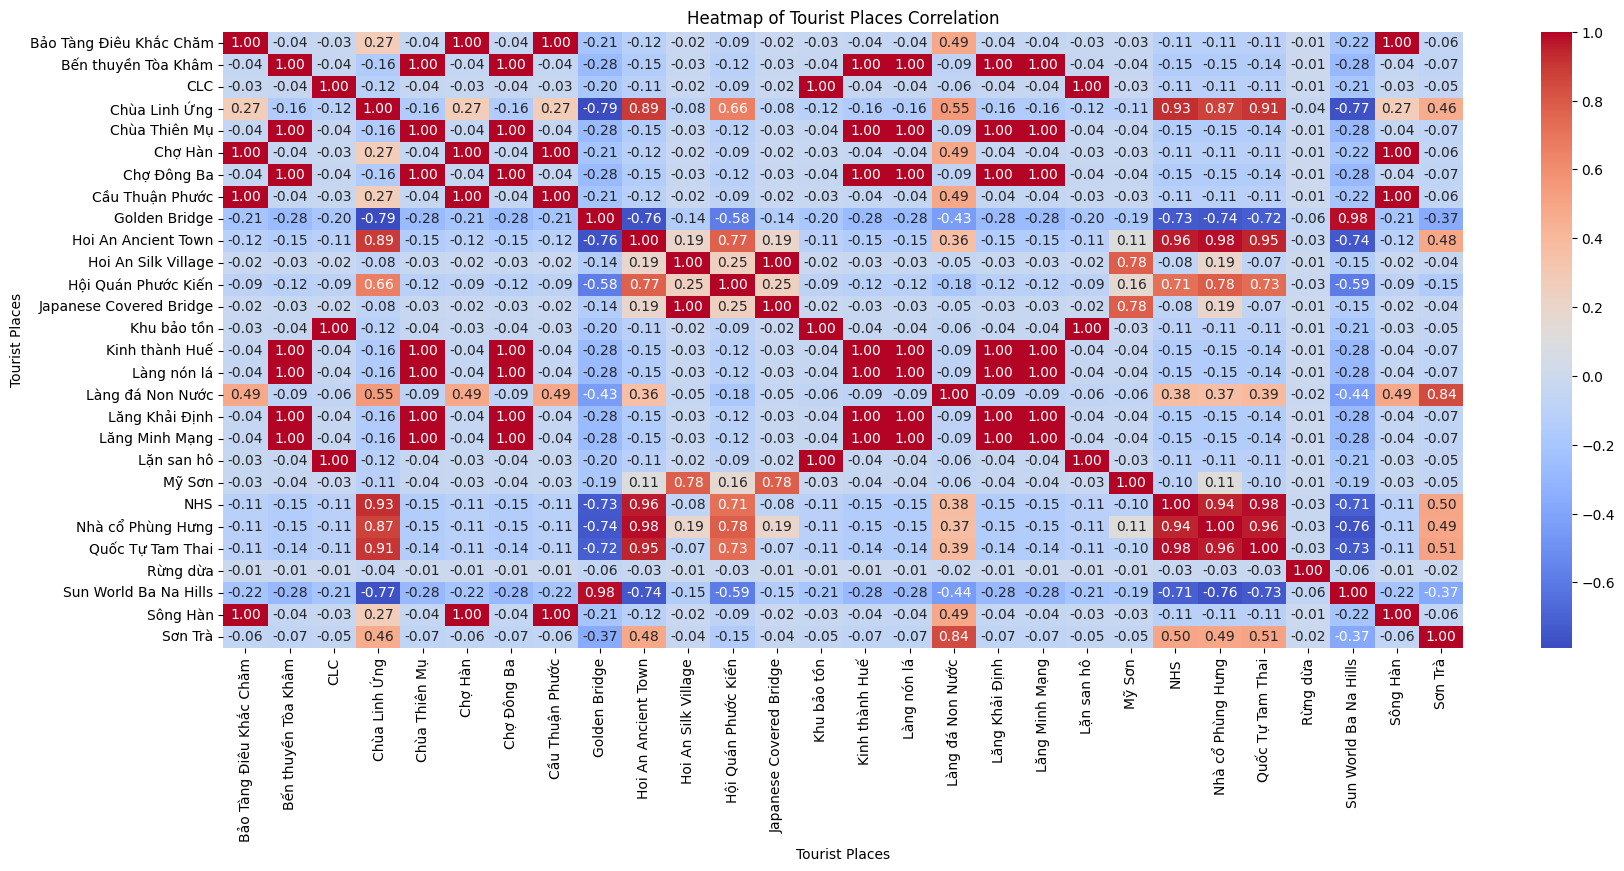

In [71]:
import seaborn as sns   
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Tourist Places Correlation')
plt.xlabel('Tourist Places')
plt.ylabel('Tourist Places')
plt.show()

In [75]:
# Loại bỏ các tương quan = 1
correlation_matrix = correlation_matrix[correlation_matrix < 1]

# # Liệt kê các tương quan từ 0 đến 0.5
# print("Tương quan từ 0 đến 0.5:")
# print(correlation_matrix[(correlation_matrix >= 0) & (correlation_matrix < 0.5)])

# # Liệt kê các tương quan từ 0.5 đến 0.7
print("\nTương quan từ 0.5 đến 0.7:")
print(correlation_matrix[(correlation_matrix >= 0.5) & (correlation_matrix < 0.7)])

# Liệt kê các tương quan từ 0.7 đến 0.9
# print("\nTương quan từ 0.7 đến 0.9:")
# print(correlation_matrix[(correlation_matrix >= 0.7) & (correlation_matrix < 0.9)])


Tương quan từ 0.5 đến 0.7:
                         Bảo Tàng Điêu Khắc Chăm  Bến thuyền Tòa Khâm  CLC  \
Bảo Tàng Điêu Khắc Chăm                      NaN                  NaN  NaN   
Bến thuyền Tòa Khâm                          NaN                  NaN  NaN   
CLC                                          NaN                  NaN  NaN   
Chùa Linh Ứng                                NaN                  NaN  NaN   
Chùa Thiên Mụ                                NaN                  NaN  NaN   
Chợ Hàn                                      NaN                  NaN  NaN   
Chợ Đông Ba                                  NaN                  NaN  NaN   
Cầu Thuận Phước                              NaN                  NaN  NaN   
Golden Bridge                                NaN                  NaN  NaN   
Hoi An Ancient Town                          NaN                  NaN  NaN   
Hoi An Silk Village                          NaN                  NaN  NaN   
Hội Quán Phước Kiến                 

In [76]:
correlation_series = correlation_matrix.stack()

# Sắp xếp theo giá trị tương quan từ thấp đến cao
sorted_correlation_series = correlation_series.sort_values()

# In ra các cặp tương quan tệ
print("Các cặp tương quan tệ:")
print(sorted_correlation_series.head(10)) 

Các cặp tương quan tệ:
Golden Bridge          Chùa Linh Ứng           -0.789943
Chùa Linh Ứng          Golden Bridge           -0.789943
                       Sun World Ba Na Hills   -0.768352
Sun World Ba Na Hills  Chùa Linh Ứng           -0.768352
Hoi An Ancient Town    Golden Bridge           -0.759219
Golden Bridge          Hoi An Ancient Town     -0.759219
Nhà cổ Phùng Hưng      Sun World Ba Na Hills   -0.757023
Sun World Ba Na Hills  Nhà cổ Phùng Hưng       -0.757023
Nhà cổ Phùng Hưng      Golden Bridge           -0.744889
Golden Bridge          Nhà cổ Phùng Hưng       -0.744889
dtype: float64


### Tương quan giữa các địa điểm theo quốc tịch 

In [29]:
filtered_ids

0        BN_PRE
1        BN_PRE
2        BN_PRE
3        BN_PRE
4            BN
          ...  
22155    NHS_HA
22156     BN_0e
22157     BN_0e
22159     BN_0e
22164    NHS_HA
Name: ID, Length: 5307, dtype: object

In [49]:
filtered_id___s = dh[dh['Nationality'] == 'angloAmerican']['ID'].unique()
filtered_id___s

array(['BN_PRE', 'BN', 'DN', 'ST_NHS_HA', 'NHS_HA', 'BN_0e', 'MS_HA',
       'HUE', 'MS', 'DN_HA', 'CLC', 'BN_PRE_0e', 'HUE_PRE', 'RD'],
      dtype=object)

In [62]:
filtered_dh = dh[dh['Nationality'] == 'else']
place_corr_df = filtered_dh[['ID']]
place_corr_df = place_corr_df.merge(dt_goc[['ID', 'Các điểm du lịch trong Tour']], on='ID', how='left')
dummy_variables = place_corr_df['Các điểm du lịch trong Tour'].str.get_dummies(sep=',')
correlation_matrix_america = dummy_variables.corr()


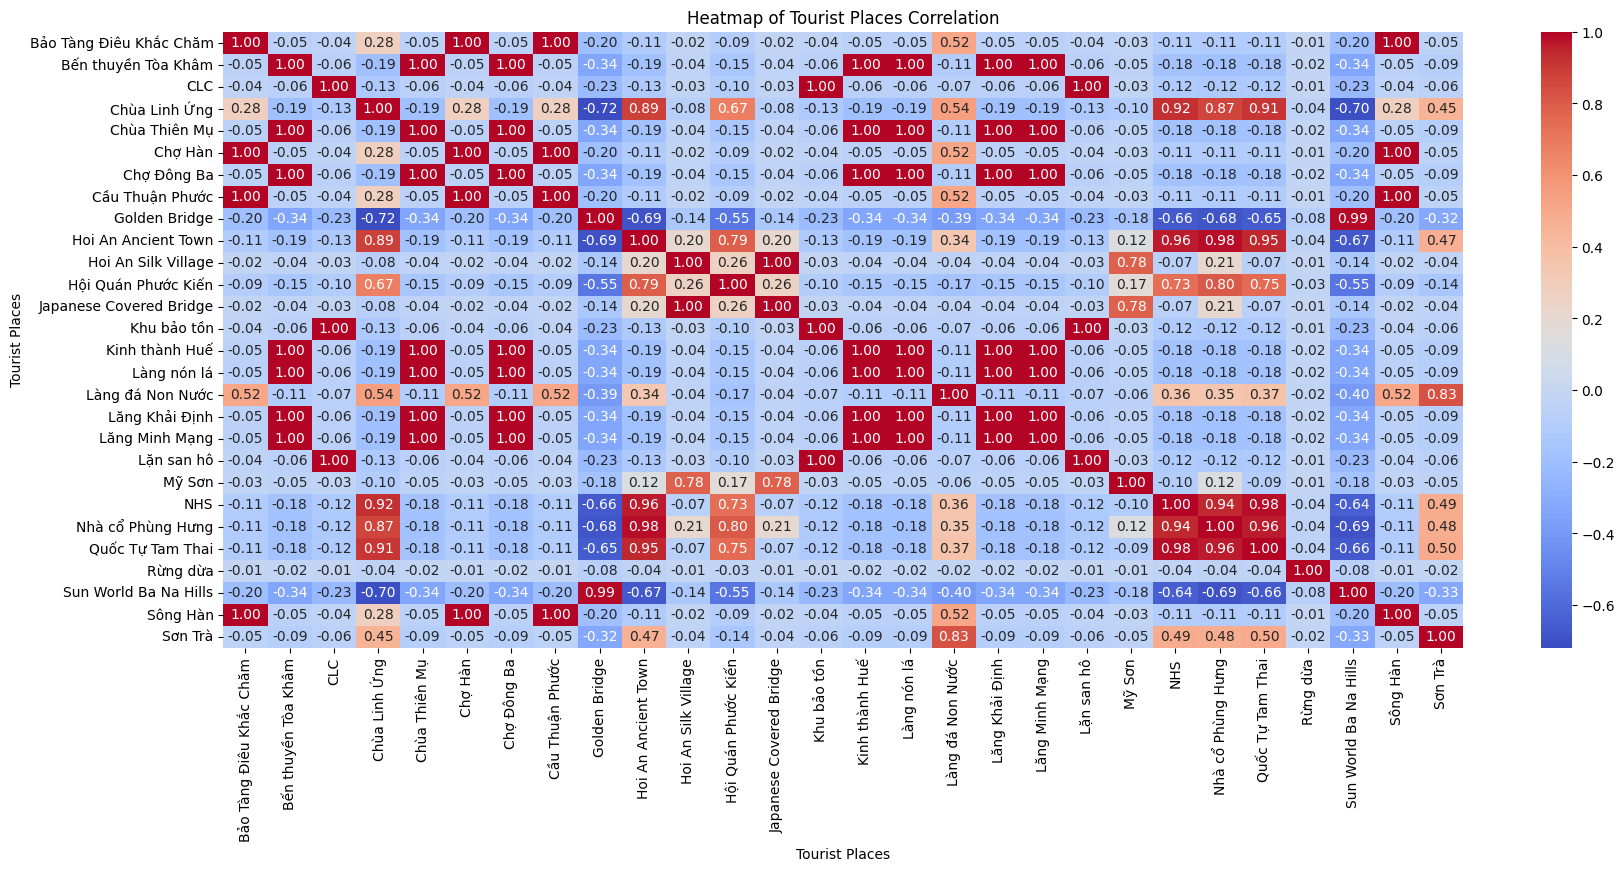

In [63]:
import seaborn as sns   
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_america, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Tourist Places Correlation')
plt.xlabel('Tourist Places')
plt.ylabel('Tourist Places')
plt.show()

=> không khác nhau là bao

## Tương quan giữa quốc tịch và chọn lựa các loại tour

In [13]:
dh.head(1)

,Đối tác,ID,Dịch vụ,Code đối tác,Tên khách,Khách sạn,1VN/2QT,khoi_hanh,ket_thuc,Ngày khởi hành,Tháng khởi hành,Ngày kết Tour,Tháng kết tour,Năm,Tour_type,Nationality,TE,NL
0,klook,BN_PRE,Bà Nà - Pre Hàn,GKP596402,PARK SO YOUNG,Sanouva Da Nang Hotel /68 phan chan trinh hai ...,2,2023-01-01,2023-01-01,1,1,1,1,2023,join_in,angloAmerican,0,3


In [14]:
dt_goc.columns

Index(['search_box', 'ID', 'Loại Tour ', 'Ăn uống (0,1)',
       'thời lượng tham quan', 'Các điểm du lịch trong Tour'],
      dtype='object')

In [21]:
nat_pre_corr_df = dh[['ID','Nationality']]

In [22]:
nat_pre_corr_df = nat_pre_corr_df.merge(dt_goc[['ID', 'Loại Tour ']], on='ID', how='left')
nat_pre_corr_df

,ID,Nationality,Loại Tour
0,BN_PRE,angloAmerican,2
1,BN_PRE,angloAmerican,2
2,BN_PRE,angloAmerican,2
3,BN_PRE,angloAmerican,2
4,BN,angloAmerican,1
...,...,...,...
22165,DN,eastAsian,1
22166,BN_PRE,eastAsian,2
22167,HUE,eastAsian,1
22168,BN,eastAsian,1


In [23]:
dummy_variables = pd.get_dummies(nat_pre_corr_df['Loại Tour '])

In [25]:
correlation_matrix_nat = nat_pre_corr_df[['Nationality']].join(dummy_variables)


In [26]:
correlation_matrix_nat

,Nationality,1,2
0,angloAmerican,0,1
1,angloAmerican,0,1
2,angloAmerican,0,1
3,angloAmerican,0,1
4,angloAmerican,1,0
...,...,...,...
22165,eastAsian,1,0
22166,eastAsian,0,1
22167,eastAsian,1,0
22168,eastAsian,1,0


In [27]:
# Tính tổng của các giá trị trong cột '1' và '2' cho mỗi giá trị trong cột 'Nationality'
pivot_table = correlation_matrix_nat.groupby('Nationality')[[1, 2]].sum().reset_index()
pivot_table = pivot_table.rename(columns={1: 'Tour ghép SL lớn', 2: 'Tour ghép dưới 12 ng'})

pivot_table

,Nationality,Tour ghép SL lớn,Tour ghép dưới 12 ng
0,angloAmerican,4713,594
1,eastAsian,6492,784
2,else,2956,373
3,european,1427,250
4,southAsian,3984,597


In [31]:
pivot_table['Xác suất chọn tour nhỏ'] = (pivot_table['Tour ghép dưới 12 ng'] / (pivot_table['Tour ghép SL lớn']+pivot_table['Tour ghép dưới 12 ng']))*100
pivot_table

,Nationality,Tour ghép SL lớn,Tour ghép dưới 12 ng,Xác suất chọn tour nhỏ
0,angloAmerican,4713,594,11.192764
1,eastAsian,6492,784,10.775151
2,else,2956,373,11.204566
3,european,1427,250,14.907573
4,southAsian,3984,597,13.032089


In [28]:
# pivot_table.to_excel('nat_tourType.xlsx',index=False)

In [30]:
correlation_matrix = pivot_table[['Tour ghép SL lớn', 'Tour ghép dưới 12 ng']].corr()

# In ra ma trận tương quan
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                      Tour ghép SL lớn  Tour ghép dưới 12 ng
Tour ghép SL lớn              1.000000              0.979644
Tour ghép dưới 12 ng          0.979644              1.000000
